<a href="https://colab.research.google.com/github/tg-bomze/collection-of-notebooks/blob/master/Destroy_n_Recover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Info - https://habr.com/en/company/timeweb/blog/549024/

# Destroy image
(RUS) Портим изображение

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Install all necessary libraries</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Установить все необходимые библиотеки</font></b>

!rm -rf /content/*
!wget https://raw.githubusercontent.com/MartKl/CS_image_recovery_demo/master/pit.py
!pip install scipy==1.1.0
!mkdir /content/imgs/

from pit import *
from IPython.display import clear_output
from google.colab import files
import scipy.ndimage as spimg
from PIL import Image
import numpy as np
import glob
import os
import imageio

clear_output()

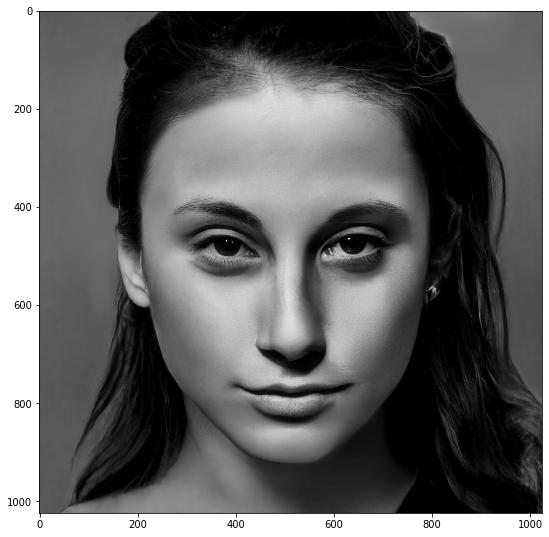

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Upload image</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Загружаем изображение</font></b>

from scipy.misc import imsave
uploaded = list(files.upload().keys())

if len(uploaded) > 1:
  raise ValueError('You cannot upload more than one audio at a time!')

cont = uploaded[0]
CONTENT_FILENAME = "content." + cont.split(".")[-1]
os.rename(cont, CONTENT_FILENAME)
content_path = "/content/imgs/" + CONTENT_FILENAME
!mv -f $CONTENT_FILENAME $content_path

# read image
Xorig = imageio.imread(content_path, as_gray=True)

# pywt can change the size -> easy fix by transforming back and forth
x = pywt.wavedec2(Xorig, wavelet='db1', level=1)
Xorig = pywt.waverec2(x, wavelet='db1')

# picture size
shape = Xorig.shape
n = np.prod(shape)

# choice of WT parameters
# choose frame
wlet = 'db12' # coif12, sym12, db12
L = 3 
# amplification of lower level wavelet coefficients
amp = np.linspace(1, .2, L)
amp = np.kron(amp, np.ones(3))
amp = np.insert(amp,0, 20)

clear_output()
pltPic(Xorig)

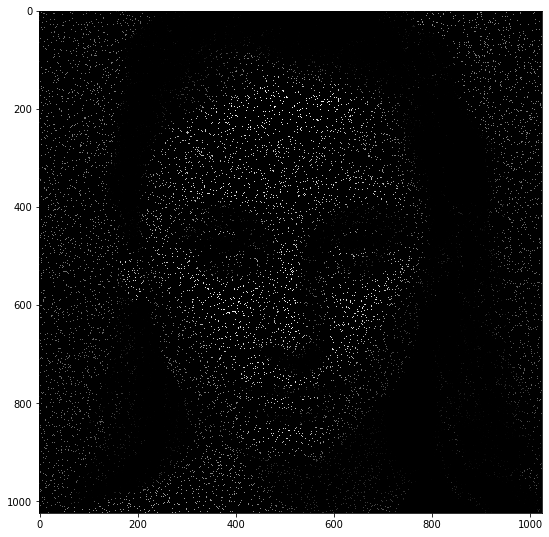

Total number of pixels: 1048k
Number of remaining pixels: 52k


In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Selecting the fraction of pixels removed</font></b>{ run: "auto", display-mode: "form" }
#@markdown <b><font color="black" size="+1"> (RUS) Указываем часть оставленных пикселей</font></b>

percent = 0.05 #@param {type:"slider", min:0.05, max:1, step:0.05}
# total number of pixels
m = int(percent*n)

# generate subsampled picture
mask = getRandMask(n, m)
Xsub = np.zeros(shape)
Xsub.flat[mask] = Xorig.flat[mask]
Xsub = Xsub.astype(np.uint8)
imageio.imwrite("/content/imgs/destroyed."+cont.split(".")[-1], Xsub)
pltPic(Xsub)
print("Total number of pixels: {}k".format(int(np.prod(Xorig.shape)/1000)))
print("Number of remaining pixels: {}k".format( int(m/1000) ))

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Download the destroyed image</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Скачиваем испорченное изображение</font></b>
files.download('/content/imgs/destroyed.'+cont.split(".")[-1])

# Recover destroyed image
(RUS) Восстанавливаем испорченное изображение

## Stage 1
(RUS) 1 Этап

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Install all necessary libraries</font></b>

#@markdown Skip this block if you haven't reloaded the page after fake image corruption

#@markdown <b><font color="black" size="+2"> (RUS) становить все необУходимые библиотеки</font></b>

#@markdown (RUS) Пропустите этот блок, если вы не перезагружали страницу после искусственной порчи изображения
!rm -rf /content/*
!wget https://raw.githubusercontent.com/MartKl/CS_image_recovery_demo/master/pit.py
!pip install scipy==1.1.0
!mkdir /content/imgs/

from pit import *
from IPython.display import clear_output
from google.colab import files
import scipy.ndimage as spimg
from PIL import Image
import numpy as np
import glob
import os
import imageio

clear_output()

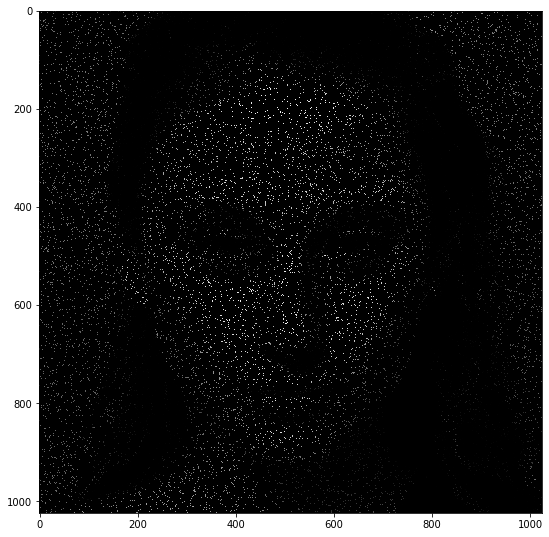

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Upload the destroyed image</font></b>

#@markdown Skip this block if you haven't reloaded the page after fake image corruption

#@markdown <b><font color="black" size="+2"> (RUS) Загружаем испорченное изображение</font></b>

#@markdown (RUS) Пропустите этот блок, если вы не перезагружали страницу после искусственной порчи изображения
from scipy.misc import imsave
uploaded = list(files.upload().keys())

if len(uploaded) > 1:
  raise ValueError('You cannot upload more than one audio at a time!')

cont2 = uploaded[0]
CONTENT_FILENAME2 = "destroyed." + cont2.split(".")[-1]
os.rename(cont2, CONTENT_FILENAME2)
content_path2 = "/content/imgs/" + CONTENT_FILENAME2
!mv -f $CONTENT_FILENAME2 $content_path2

Xsub2 = imageio.imread(content_path2, as_gray=True)
# pywt can change the size -> easy fix by transforming back and forth
x = pywt.wavedec2(Xsub2, wavelet='db1', level=1)
Xsub2 = pywt.waverec2(x, wavelet='db1')

# picture size
shape = Xsub2.shape
n = np.prod(shape)

# choice of WT parameters
# choose frame
wlet = 'db12' # coif12, sym12, db12
L = 3 
# amplification of lower level wavelet coefficients
amp = np.linspace(1, .2, L)
amp = np.kron(amp, np.ones(3))
amp = np.insert(amp,0, 20)

clear_output()
pltPic(Xsub2)

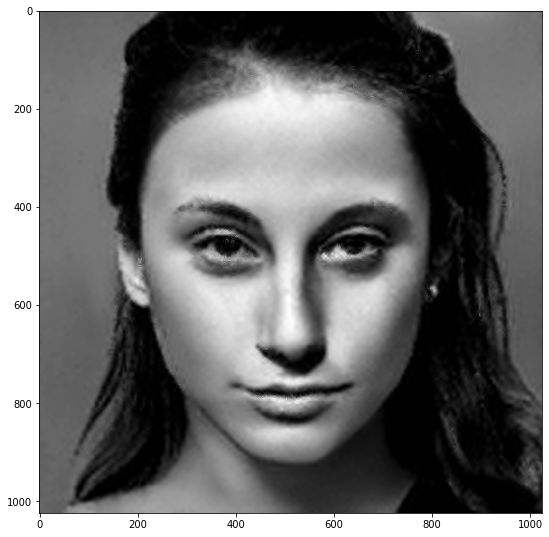

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Recover destroyed image</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Восстанавливаем испорченное изображение</font></b>


### schedule for DCT and WT iterations
steps_wt = 14
steps_dct = 10 #parameter for nr. of steps in fixed basis
N = 7 #nr. of switching bases: wt and dct

# threshold values
th_wt  = np.append( np.linspace(25,4,N-1), 4 )
th_dct = np.append( np.linspace(15,3,N-1), 3 )

# set initial guess for the reconstruction
if 'Xrec' not in locals():
    Xrec = Xsub
    
Xrec = Xsub

# set transformations
dct = DCT(shape)
wt = WT(shape, wavelet=wlet,level=L, amplify=amp)

#with myprofile.Profiler(fname='profile.dat'):
for j in range(N):
    thOp = softTO(th_dct[j])
    Xrec=FISTA(dct, thOp, mask, Xsub, stepsize = .75, n_steps=steps_dct, X0=Xrec)
    
    thOp = softTO(th_wt[j])
    Xrec=FISTA(wt, thOp, mask, Xsub, stepsize = .75, n_steps=steps_wt, X0=Xrec)

Xrec = Xrec.astype(np.uint8)
imageio.imwrite("/content/imgs/recovered.png", Xrec)
clear_output()
pltPic(Xrec)

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Download recovered image</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Скачиваем восстановленное изображение</font></b>
files.download('/content/imgs/recovered.png')

## Stage 2: DFDNet (if the photo shows a portrait of one person)
(RUS) 2 Этап: DFDNet (если на фото портрет одного человека)

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Install all necessary libraries</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Установить все необходимые библиотеки</font></b>
!pip install dominate

from google.colab import drive
from IPython.display import clear_output
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import warnings
import os

warnings.filterwarnings("ignore")
%matplotlib inline

!rm -rf /content/sample_data
!git clone https://github.com/tg-bomze/DFDNet.git

!mkdir /content/DFDNet/checkpoints/
!mkdir /content/DFDNet/checkpoints/facefh_dictionary
!mkdir /content/DFDNet/weights/
!mkdir /content/DFDNet/DictionaryCenter512/

os.chdir('/content/DFDNet/FaceLandmarkDetection/')
!python setup.py install
os.chdir('/content/')
clear_output()
!nvidia-smi -L

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Save the weights of the pretrained model and mount Google Drive</font></b>
#@markdown **Follow this link:**

#@markdown **https://drive.google.com/drive/folders/1bayYIUMCSGmoFPyd4Uu2Uwn347RW-vl5**

#@markdown **1) right click on 'DFDNet' (top center)**

#@markdown **2) select 'Add shortcut to Drive**

#@markdown <b><font color="black" size="+2"> (RUS) Сохраняем веса предобученной модели и монтируем гугл драйв</font></b>

#@markdown **Перейдите по следующей ссылке:**

#@markdown **https://drive.google.com/drive/folders/1bayYIUMCSGmoFPyd4Uu2Uwn347RW-vl5**

#@markdown **1) ткните правой кнопкой мыши по 'DFDNet' (сверху по центру)**

#@markdown **2) нажмите 'Добавить ярлык на Диск'**

#@markdown ![](https://raw.githubusercontent.com/tg-bomze/DFDNet/whole/shortcut.JPG)

#@markdown *Attention! If the weights have already been saved, then run this block and just mount Google Drive.*

#@markdown *(RUS) Внимание! Если веса уже сохранены, то только запустите этот блок и смонтируйте Гугл Драйв.*

print("(RUS) Перейдите по ссылке ниже, выберите аккаунт, куда сохранили предобученную модель,")
print("нажмите на кнопку 'Разрешить', скопируйте авторизационный код в нижнее поле и нажмите Enter.")
drive.mount('/content/drive')
clear_output()

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Copying weights to Colab</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Копируем веса в Колаб</font></b>

print("0%/100%   Copying has started and will take about 4 minutes.")
!cp '/content/drive/My Drive/DFDNet/checkpoints/facefh_dictionary/latest_net_G.pth' '/content/DFDNet/checkpoints/facefh_dictionary'
print("33%/100%  Checkpoints copied")
!cp '/content/drive/My Drive/DFDNet/weights/vgg19.pth' '/content/DFDNet/weights/'
print("66%/100%  Weights copied")
!cp -r '/content/drive/My Drive/DFDNet/DictionaryCenter512/' '/content/DFDNet/'
print("100%/100% Dictionary copied")

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Start enchance</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Запустить улучшение</font></b>

!rm -rf /content/DFDNet/TestData/TestWhole/*
content_path3 = "/content/DFDNet/TestData/TestWhole/"

try: !cp /content/imgs/recovered.png $content_path3
except:
  print('The file restored after Stage 1 was not saved. If you managed to download it, then download it manually:')
  print('(RUS) Файл, восстановленный после 1 Этапа не сохранился. Если вы успели его скачать, то загрузите его вручную:\n')
  uploaded = list(files.upload().keys())
  if len(uploaded) > 1:
    raise ValueError('Вы можете загрузить только одно фото!')
  cont3 = uploaded[0]
  CONTENT_FILENAME3 = "recovered." + cont3.split(".")[-1]
  os.rename(cont3, CONTENT_FILENAME3)
  !mv -f $CONTENT_FILENAME3 $content_path3

pil_ishod = Image.open('/content/DFDNet/TestData/TestWhole/recovered.png')
(temp_width, temp_height) = pil_ishod.size

upscale_factor = 4 #@param {type:"slider", min:1, max:4, step:1}
os.chdir('/content/DFDNet/')
!python test_FaceDict.py --test_path ./TestData/TestWhole --results_dir ./Results/TestWholeResults --upscale_factor $upscale_factor --gpu_ids 0
clear_output()

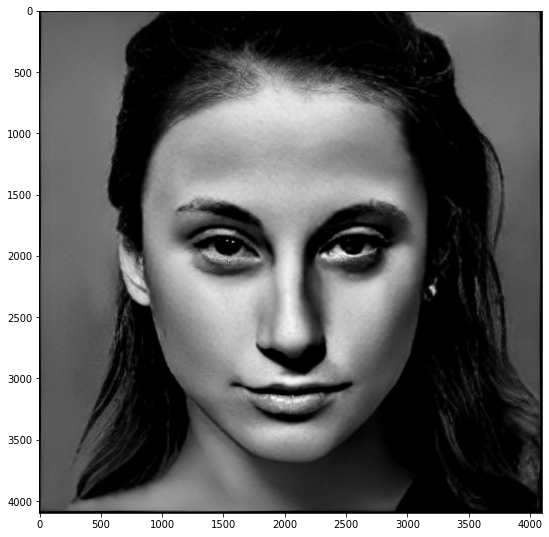

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Combine with the original image</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Объеденить с оригинальным изображением</font></b>

print('\n###############################################################################')
print('############### Step 4: Paste the Restored Face to the Input Image ############')
print('###############################################################################\n')
from data.image_folder import make_dataset
from skimage import io
import numpy as np
import cv2
import dlib

def reverse_align(input_path, face_path, param_path, save_path, upsample_scale=2):
    out_size = (512, 512) 
    input_img = dlib.load_rgb_image(input_path)
    h,w,_ = input_img.shape
    face512 = dlib.load_rgb_image(face_path)
    inv_M = np.loadtxt(param_path)
    inv_crop_img = cv2.warpAffine(face512, inv_M, (w*upsample_scale,h*upsample_scale))
    mask = np.ones((512, 512, 3), dtype=np.float32) #* 255
    inv_mask = cv2.warpAffine(mask, inv_M, (w*upsample_scale,h*upsample_scale))
    upsample_img = cv2.resize(input_img, (w*upsample_scale, h*upsample_scale))
    inv_mask_erosion_removeborder = cv2.erode(inv_mask, np.ones((2 * upsample_scale, 2 * upsample_scale), np.uint8))# to remove the black border
    inv_crop_img_removeborder = inv_mask_erosion_removeborder * inv_crop_img
    total_face_area = np.sum(inv_mask_erosion_removeborder)//3
    w_edge = int(total_face_area ** 0.5) // 20 #compute the fusion edge based on the area of face
    erosion_radius = w_edge * 2
    inv_mask_center = cv2.erode(inv_mask_erosion_removeborder, np.ones((erosion_radius, erosion_radius), np.uint8))
    blur_size = w_edge * 2
    inv_soft_mask = cv2.GaussianBlur(inv_mask_center,(blur_size + 1, blur_size + 1),0)
    merge_img = inv_soft_mask * inv_crop_img_removeborder + (1 - inv_soft_mask) * upsample_img
    io.imsave(save_path, merge_img.astype(np.uint8))

TestImgPath = './TestData/TestWhole'
ResultsDir = './Results/TestWholeResults'
UpScaleWhole = upscale_factor
SaveRestorePath = os.path.join(ResultsDir,'Step3_RestoreCropFace')# Only Face Results
SaveFianlPath = os.path.join(ResultsDir,'Step4_FinalResults')
SaveParamPath = os.path.join(ResultsDir,'Step1_AffineParam') #save the inverse affine parameters
if not os.path.exists(SaveFianlPath):
    os.makedirs(SaveFianlPath)
ImgPaths = make_dataset(SaveRestorePath)
for i,ImgPath in enumerate(ImgPaths):
    ImgName = os.path.split(ImgPath)[-1]
    print('Final Restoring {}'.format(ImgName))
    WholeInputPath = os.path.join(TestImgPath,ImgName)
    FaceResultPath = os.path.join(SaveRestorePath, ImgName)
    ParamPath = os.path.join(SaveParamPath, ImgName+'.npy')
    SaveWholePath = os.path.join(SaveFianlPath, ImgName)
    reverse_align(WholeInputPath, FaceResultPath, ParamPath, SaveWholePath, UpScaleWhole)

clear_output()
try: enchance_img_path = '/content/DFDNet/Results/TestWholeResults/Step4_FinalResults/recovered.' + cont2.split(".")[-1]
except: enchance_img_path = '/content/DFDNet/Results/TestWholeResults/Step4_FinalResults/recovered.' + cont3.split(".")[-1]
try: 
  pil_result = Image.open(enchance_img_path)
  pil_result.resize((temp_width, temp_height))
  pil_result.save('/content/imgs/recovered.png')
  itog = imageio.imread("/content/imgs/recovered.png", as_gray=True)
  itog = itog.astype(np.uint8)
  imageio.imwrite("/content/imgs/recovered.png", itog)
  pltPic(itog)
except: pass

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Download the final result</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Скачать итоговый результат</font></b>
files.download('/content/imgs/recovered.png')

## Stage 3: DeOldify
(RUS) 3 Этап: DeOldify

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Install all necessary libraries</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Установить все необходимые библиотеки</font></b>

import torch
import fastai
%cd /content
!git clone https://github.com/jantic/DeOldify.git DeOldifyPhoto
%cd /content/DeOldifyPhoto
from deoldify import device
from deoldify.device_id import DeviceId
device.set(device=DeviceId.GPU0)
if not torch.cuda.is_available():
    print('GPU not available.')
!pip install -r colab_requirements.txt
clear_output()

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Download pretrained model</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Качаем предобученную модель</font></b>

from deoldify.visualize import *
torch.backends.cudnn.benchmark = True
!mkdir 'models'
!rm -rf models/ColorizeStable_gen.pth
!wget https://www.dropbox.com/s/mwjep3vyqk5mkjc/ColorizeStable_gen.pth?dl=0 -O ./models/ColorizeStable_gen.pth
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png
colorizer = get_image_colorizer(artistic=False)
clear_output()

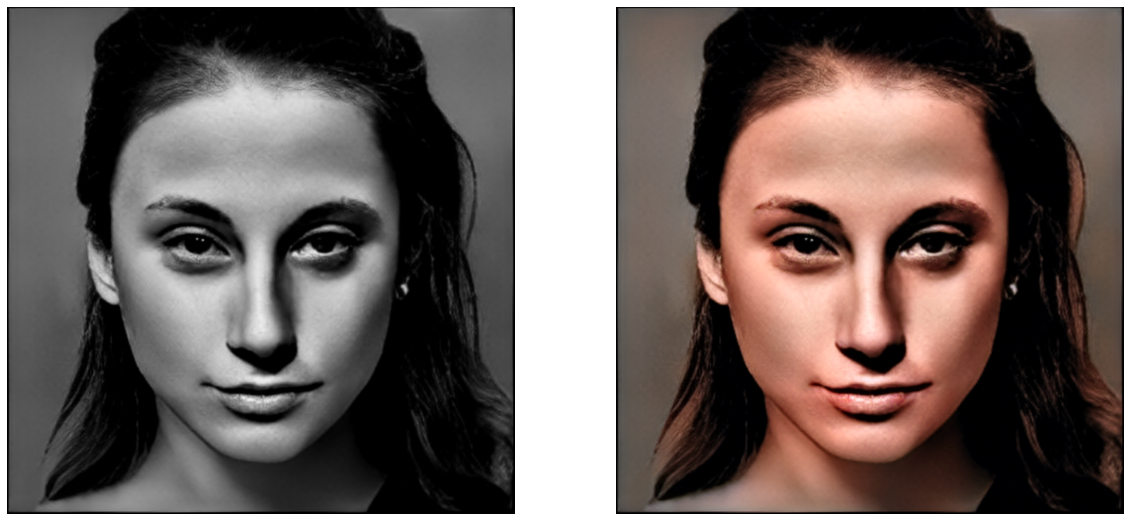

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Coloring the image</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Раскрашиваем изображение</font></b>

render_factor = 35  #@param {type: "slider", min: 5, max: 44}
image_path = colorizer.plot_transformed_image(path='/content/imgs/recovered.png', render_factor=render_factor, compare=True, watermarked=False)
!cp -r /content/DeOldifyPhoto/result_images/recovered.png /content/imgs/colored_n_recovered.png


In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Download the final result</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Скачать итоговый результат</font></b>
files.download('/content/imgs/colored_n_recovered.png')